# WEATHER DATA


Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clima.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df['Data_Value'] /= 10

,ID,Date,Element,Data_Value
0,CA006142402,2009-07-14,TMAX,22.5
1,CA00615S001,2014-05-19,TMIN,4.0
2,CA006142286,2007-12-20,TMIN,-5.0
3,CA006155790,2011-08-16,TMIN,9.5
4,CA006158355,2007-09-13,TMIN,10.6
...,...,...,...,...
101887,CA006142286,2008-05-19,TMIN,1.7
101888,CA006142400,2013-11-08,TMIN,-1.5
101889,CA006152695,2006-08-07,TMIN,19.5
101890,CA006145504,2005-06-10,TMIN,19.9


In [6]:
# Creo una columna mes-dia
df['Date2'] = df['Date'].dt.strftime('%m-%d')

#Elimino feb 29
df = df[~(df['Date2'] == '02-29')]


# DIVIDO EN 2015 Y EL RESTO (DE 2014 PARA ABAJO) y en TMAX y TMIN
t_max = df[(df['Date'] <= '2014-12-31') & (df['Element'] == 'TMAX')]
t_min = df[(df['Date'] <= '2014-12-31') & (df['Element'] == 'TMIN')]

a2015_max = df[(df['Date'] > '2014-12-31') & (df['Element'] == 'TMAX')]
a2015_min = df[(df['Date'] > '2014-12-31') & (df['Element'] == 'TMIN')]

### EN **2015-06-01** NO HAY REGISTROS DE TEMPERATURAS

In [7]:
# SACO EL MÁXIMO Y MÍNIMO DE CADA GRUPO mes-día Y ME QUEDO SOLO
# CON Date2 y Data_Value

t_max_final = t_max.groupby('Date2', as_index=False).max()[['Date2', 'Data_Value']]
t_min_final = t_min.groupby('Date2', as_index=False).min()[['Date2', 'Data_Value']]

a2015_max_final = a2015_max.groupby('Date2', as_index=False).max()[['Date2', 'Data_Value']]
a2015_max_final = a2015_max_final.append({'Date2':'06-01', 
                        'Data_Value':np.nan}, ignore_index=True)

a2015_min_final = a2015_min.groupby('Date2', as_index=False).min()[['Date2', 'Data_Value']]
a2015_min_final = a2015_min_final.append({'Date2':'06-01', 
                        'Data_Value':np.nan}, ignore_index=True)

In [8]:
'''
YA QUE HE AGRUPADO mes-año, ASUMO QUE TODOS LOS VALORES TIENEN EL MISMO ÍNDICE
POR LO QUE LOS INDEX VAN DEL RANGO DEL 01-01 A 12-31 DEL 2015 :D

'''
t_max_final['year'] = pd.to_datetime('2015-' + t_max_final['Date2'])
t_max_final.drop(columns='Date2', inplace=True)
t_max_final.set_index('year', inplace=True)

t_min_final['year'] = pd.to_datetime('2015-' + t_min_final['Date2'])
t_min_final.drop(columns='Date2', inplace=True)
t_min_final.set_index('year', inplace=True)

a2015_max_final['year'] = pd.to_datetime('2015-' + a2015_max_final['Date2'])
a2015_max_final.drop(columns='Date2', inplace=True)
a2015_max_final.set_index('year', inplace=True)
a2015_max_final.sort_index(inplace=True)

a2015_min_final['year'] = pd.to_datetime('2015-' + a2015_min_final['Date2'])
a2015_min_final.drop(columns='Date2', inplace=True)
a2015_min_final.set_index('year', inplace=True)
a2015_min_final.sort_index(inplace=True)

In [9]:
min_del_min = a2015_min_final[a2015_min_final['Data_Value'] < t_min_final['Data_Value']]
max_del_max = a2015_max_final[a2015_max_final['Data_Value'] > t_max_final['Data_Value']]

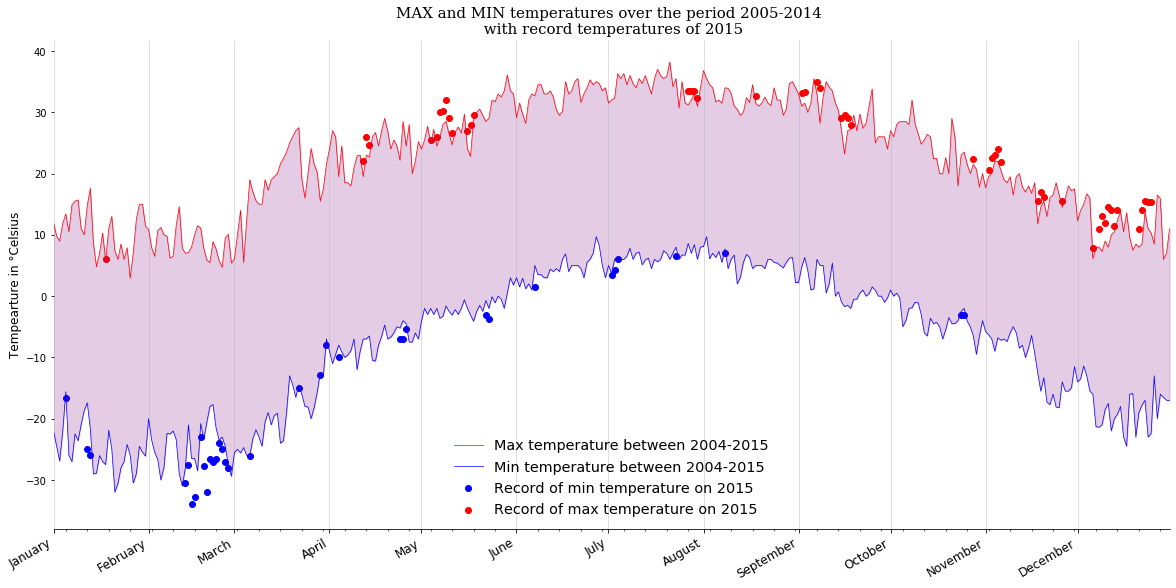

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from calendar import month_abbr
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

months = mdates.MonthLocator()  # every month
days = mdates.WeekdayLocator(byweekday=MO) # every monday # EN CASO DE QUERER PONER EL GRID EN ALGÚN DÍA EN ESPECÍFICO
months_fmt = mdates.DateFormatter('%B')

fig, ax = plt.subplots(figsize=(20,10))


# LINE PLOT
ax.plot(t_max_final, color='red', lw=0.7, label='Max temperature between 2004-2015')
ax.plot(t_min_final, color='blue', lw=0.7, label='Min temperature between 2004-2015')

# PARA EL GRID
ax.xaxis.set_major_locator(months)
# Formato para los meses
ax.xaxis.set_major_formatter(months_fmt)
ax.xaxis.set_minor_locator(days)

# PARA QUE NO MUESTRE UN DÍA DE MÁS O DE MENOS EN EL EJE X
# (Que vaya exactamente del 01/enero al 31/dic)
ax.set_xlim(t_max_final.index[0], t_max_final.index[-1])


# PARA QUITAR LOS BORDES DEL FRAME
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# ax.spines["bottom"].set_visible(False)

# LOS VALORES RÉCORD DEL 2015
plt.scatter(min_del_min.index, min_del_min['Data_Value'], color='blue', label='Record of min temperature on 2015')
plt.scatter(max_del_max.index, max_del_max['Data_Value'], color='red', label='Record of max temperature on 2015')


# format the coords message box (alch no sé qué hace esto XD)
# (creo que es por si quiese mostrar las fechas con otro formato en el eje x)
ax.format_xdata = mdates.DateFormatter('%m-%d')
# ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.
ax.grid(True, which='major', axis='x', alpha=0.5)


# PARA EL FILL ENTRE LOS DOS lineplot
ax.fill_between(list(t_max_final.index), t_min_final['Data_Value'], t_max_final['Data_Value'], color='purple', alpha=0.2)

# PARA QUE EL GRID MUESTRE LA SEPARACIÓN DE MESES DE MANERA SUTIL
ax.tick_params(axis='x', which='major', labelsize=12)

# LABEL DE EJE Y
plt.ylabel('Tempearture in °Celsius', fontsize=12)

# TÍTULO 
plt.title('MAX and MIN temperatures over the period 2005-2014 \n with record temperatures of 2015', fontsize=15, fontfamily='serif')

# POSICIÓN DE LAS LEGEND
plt.legend(loc='lower center',fontsize='x-large', framealpha=0,
           #prop={'family':'serif'}
          )
# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()
fig.savefig('assigment2.png')